<a href="https://colab.research.google.com/github/MR-Toufigh/Basics-of-intelligent-systems-fall-2024/blob/main/The_first_mini_project_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# part 1: download data


1.   Step 1: Install the gdown package
2.   Step 2: Download the ZIP file using gdown
3.   Step 3: import zipfile librarie
4.   Step 4: Extract the zip file

   

In [2]:
# This command installs the gdown package, ensuring you get the latest version by avoiding cache.
!pip install --upgrade --no-cache-dir gdown -q

# Replace 'YOUR_FILE_ID' with the Google Drive file ID of the ZIP file you want to download.
# You can find the file ID in the shared link of the file from Google Drive.
!gdown 'https://drive.google.com/uc?id=12kcNBpuJj7ZWqXObRaa2a4SsCI4tgT2y'

import zipfile

# Extract the zip file
with zipfile.ZipFile("/content/credit-card-customers.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")



Downloading...
From: https://drive.google.com/uc?id=12kcNBpuJj7ZWqXObRaa2a4SsCI4tgT2y
To: /content/credit-card-customers.zip
100% 388k/388k [00:00<00:00, 15.1MB/s]


# Overview of CSV File Loading and Analysis

**Loading and Analyzing the CSV File**:
The following commands load the CSV file extracted from the ZIP file into a pandas DataFrame for further analysis. The file path to the CSV (`'/content/BankChurners.csv'`) is specified, and pandas (`pd`) is used to read the file into a DataFrame (`df`). Summary information, the number of records, and the feature names are printed to give a comprehensive overview of the dataset.

- **Import Necessary Libraries**: The pandas library (`pd`) is imported to facilitate data loading and manipulation.
- **Load the CSV File**: The file path of the extracted CSV file (`'/content/BankChurners.csv'`) is specified, and the file is read using `pd.read_csv()` into the DataFrame `df`.
- **Display Dataset Summary**: The `df.info()` function prints summary information about the dataset, such as column names, non-null counts, and data types.
- **Number of Samples**: The `len(df)` function provides the number of rows in the dataset, representing the total number of records available.
- **List of Features**: The `df.columns` attribute lists all the columns in the dataset, providing an overview of the features that can be analyzed.




In [3]:
# Import necessary libraries
import pandas as pd

# Load the CSV file extracted from the zip
file_path = "/content/BankChurners.csv"  # Path to the extracted CSV file
df = pd.read_csv(file_path)

# Print summary information about the dataset
print("Summary information of the dataset:")
print(df.info())


# Display the number of samples in the dataset
print("Number of samples in the dataset:")
print(len(df))

# Display the names of the columns in the dataset
print("Features available in the dataset:")
print(df.columns)



Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                       

The dataset summary indicates that we have a comprehensive dataset containing 10,127 entries and 23 columns. All columns have non-null counts of 10,127, which means there are no missing values in the dataset, simplifying data preprocessing steps.

Data Types:

Numeric Columns (17 total):
Integers (int64): 10 columns, including variables like CLIENTNUM, Customer_Age, Dependent_count, etc.
Floats (float64): 7 columns, including Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, etc.
Categorical Columns (6 total):
Objects (object): 6 columns, such as Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, and Card_Category.
Key Observations:

Target Variable:

The Attrition_Flag column is likely the target variable, indicating whether a customer has churned or is active.
Customer Demographics:

Variables like Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, and Income_Category provide demographic information that could be vital for understanding patterns related to customer attrition.
Account and Transactional Data:

Features such as Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, and Total_Trans_Ct offer insights into customer behavior and financial status.
Behavioral Metrics:

Columns like Months_Inactive_12_mon and Contacts_Count_12_mon may help identify engagement levels with the bank.


# Identifying Numeric and Non-Numeric Columns

**Identify Numeric and Non-Numeric Columns**:
This section uses pandas' `select_dtypes` method to identify numeric (`int64`, `float64`) and non-numeric (`object`) columns within the dataset. This distinction helps us perform suitable calculations for each type of data.

- **Identify Numeric Columns**: Numeric columns are selected using `df.select_dtypes(include=['int64', 'float64'])`. These columns contain numerical data that can be used for statistical analysis.
- **Identify Non-Numeric Columns**: Non-numeric (categorical) columns are selected using `df.select_dtypes(include=['object'])`. These columns contain categorical information, such as names or labels.







In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
object_cols = df.select_dtypes(include=['object']).columns

# Summary Statistics for Numeric Columns

**Calculating Mean, Min, and Max for Numeric Columns**:
For each numeric column in the dataset, the mean, minimum, and maximum values are calculated and printed. This provides insight into the overall range and distribution of the numerical data.

- **Loop through Numeric Columns**: For each numeric column, the `mean()`, `min()`, and `max()` functions are used to compute summary statistics.
- **Print Summary**: The calculated mean, minimum, and maximum values are printed for each numeric feature.




In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
object_cols = df.select_dtypes(include=['object']).columns

# Calculating mean, min, and max for numeric columns
print("Summary Statistics for Numeric Columns:")
for col in numeric_cols:
    mean_value = df[col].mean()
    min_value = df[col].min()
    max_value = df[col].max()
    print(f"{col} - Mean: {mean_value:.2f}, Min: {min_value}, Max: {max_value}")

Summary Statistics for Numeric Columns:
CLIENTNUM - Mean: 739177606.33, Min: 708082083, Max: 828343083
Customer_Age - Mean: 46.33, Min: 26, Max: 73
Dependent_count - Mean: 2.35, Min: 0, Max: 5
Months_on_book - Mean: 35.93, Min: 13, Max: 56
Total_Relationship_Count - Mean: 3.81, Min: 1, Max: 6
Months_Inactive_12_mon - Mean: 2.34, Min: 0, Max: 6
Contacts_Count_12_mon - Mean: 2.46, Min: 0, Max: 6
Credit_Limit - Mean: 8631.95, Min: 1438.3, Max: 34516.0
Total_Revolving_Bal - Mean: 1162.81, Min: 0, Max: 2517
Avg_Open_To_Buy - Mean: 7469.14, Min: 3.0, Max: 34516.0
Total_Amt_Chng_Q4_Q1 - Mean: 0.76, Min: 0.0, Max: 3.397
Total_Trans_Amt - Mean: 4404.09, Min: 510, Max: 18484
Total_Trans_Ct - Mean: 64.86, Min: 10, Max: 139
Total_Ct_Chng_Q4_Q1 - Mean: 0.71, Min: 0.0, Max: 3.714
Avg_Utilization_Ratio - Mean: 0.27, Min: 0.0, Max: 0.999
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 - Mean: 0.16, Min: 7.6642e-06, Max:

# Count and Percentage for Categorical Columns

**Count and Percentage for Categorical Columns**:
For each categorical (non-numeric) column, the count and percentage of each unique value are calculated and displayed. This helps us understand how the categories are distributed within the dataset.

- **Calculate Count and Percentage**: The `value_counts()` method is used to determine the frequency of each category, and percentages are calculated relative to the total number of samples.
- **Print Count and Percentage**: For each category, the count and percentage are printed to provide a detailed view of categorical distributions.




In [6]:
print("\nCount and Percentage for Categorical Columns:")
# Calculating count and percentage for object columns
total_samples = len(df)
for col in object_cols:
    value_counts = df[col].value_counts()
    percentages = (value_counts / total_samples) * 100
    print(f"\n{col}:")
    for value, count in value_counts.items():
        percentage = percentages[value]
        print(f"  {value} - Count: {count}, Percentage: {percentage:.2f}%")


Count and Percentage for Categorical Columns:

Attrition_Flag:
  Existing Customer - Count: 8500, Percentage: 83.93%
  Attrited Customer - Count: 1627, Percentage: 16.07%

Gender:
  F - Count: 5358, Percentage: 52.91%
  M - Count: 4769, Percentage: 47.09%

Education_Level:
  Graduate - Count: 3128, Percentage: 30.89%
  High School - Count: 2013, Percentage: 19.88%
  Unknown - Count: 1519, Percentage: 15.00%
  Uneducated - Count: 1487, Percentage: 14.68%
  College - Count: 1013, Percentage: 10.00%
  Post-Graduate - Count: 516, Percentage: 5.10%
  Doctorate - Count: 451, Percentage: 4.45%

Marital_Status:
  Married - Count: 4687, Percentage: 46.28%
  Single - Count: 3943, Percentage: 38.94%
  Unknown - Count: 749, Percentage: 7.40%
  Divorced - Count: 748, Percentage: 7.39%

Income_Category:
  Less than $40K - Count: 3561, Percentage: 35.16%
  $40K - $60K - Count: 1790, Percentage: 17.68%
  $80K - $120K - Count: 1535, Percentage: 15.16%
  $60K - $80K - Count: 1402, Percentage: 13.84%
  

Data Types:

Numeric Columns (17):
Integers (int64): 10 columns (e.g., Customer_Age, Dependent_count).
Floats (float64): 7 columns (e.g., Credit_Limit, Avg_Utilization_Ratio).
Categorical Columns (6):
Objects (object): 6 columns (e.g., Attrition_Flag, Gender, Education_Level).
Key Observations:

Target Variable - Attrition_Flag:

Indicates customer status: Existing Customer (83.93%) and Attrited Customer (16.07%).
The dataset is imbalanced, with a higher proportion of existing customers.
Customer Demographics:

Age:
Mean age is 46.33 years, ranging from 26 to 73 years.
Gender:
Slightly more female customers (52.91%) than males (47.09%).
Dependent Count:
Average of 2.35 dependents per customer.
Education Level:
Majority are Graduates (30.89%) or have High School education (19.88%).
15% have 'Unknown' education level.
Marital Status:
Predominantly Married (46.28%) or Single (38.94%).
7.4% are 'Unknown'.
Financial Attributes:

Income Category:
Largest group earns Less than $40K (35.16%).
10.98% have 'Unknown' income.
Credit Limit:
Average limit is $8,631.95, ranging from $1,438.30 to $34,516.00.
Avg_Open_To_Buy:
Mean available credit is $7,469.14.
Customer Behavior Metrics:

Months on Book:
Customers have been with the bank for an average of 35.93 months (~3 years).
Months Inactive in Last 12 Months:
Average of 2.34 months inactive.
Contacts in Last 12 Months:
Mean of 2.46 contacts with the bank.
Total Transactions:
Average transaction amount is $4,404.09.
Average transaction count is 64.86 per year.
Utilization Ratio:
Mean credit utilization is 27%, indicating moderate use of available credit.
Card Category:

Majority hold the Blue card (93.18%).
Premium cards like Silver, Gold, and Platinum are less common.

# Visualizing Interrelationships Among Selected Features

**Importation of Essential Libraries**:
We commence by importing `seaborn` and `matplotlib.pyplot`, two sophisticated libraries for data visualization. `Seaborn` offers advanced functionalities for generating insightful visualizations, such as pairplots, which are instrumental in exploring interrelationships among multiple variables in a dataset.






In [7]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

**Feature Selection for Visualization**:
In this phase, specific numeric features are selected from the dataset for visualization of their distribution and mutual interrelationships. The selected features are as follows:
- `'Customer_Age'`
- `'Dependent_count'`
- `'Months_Inactive_12_mon'`
- `'Avg_Open_To_Buy'`
- `'Total_Trans_Amt'`
- `'Avg_Utilization_Ratio'`

These features were judiciously chosen to elucidate key dimensions of customer behavior and financial engagement.

In [8]:
# Select numeric features for pairplot visualization
selected_features = [
    'Customer_Age',
    'Dependent_count',
    'Months_Inactive_12_mon',
    'Avg_Open_To_Buy',
    'Total_Trans_Amt',
    'Avg_Utilization_Ratio'
]

**Constructing the Pairplot for Selected Features**:
In this section, we utilize the `sns.pairplot()` function to visualize the pairwise relationships among the selected numeric features. The pairplot serves as an efficacious tool for identifying underlying correlations, assessing distributional properties, and detecting potential outliers. By generating these visual representations, we gain a nuanced understanding of the dynamic interactions between variables, which can significantly inform feature engineering and the development of predictive models.



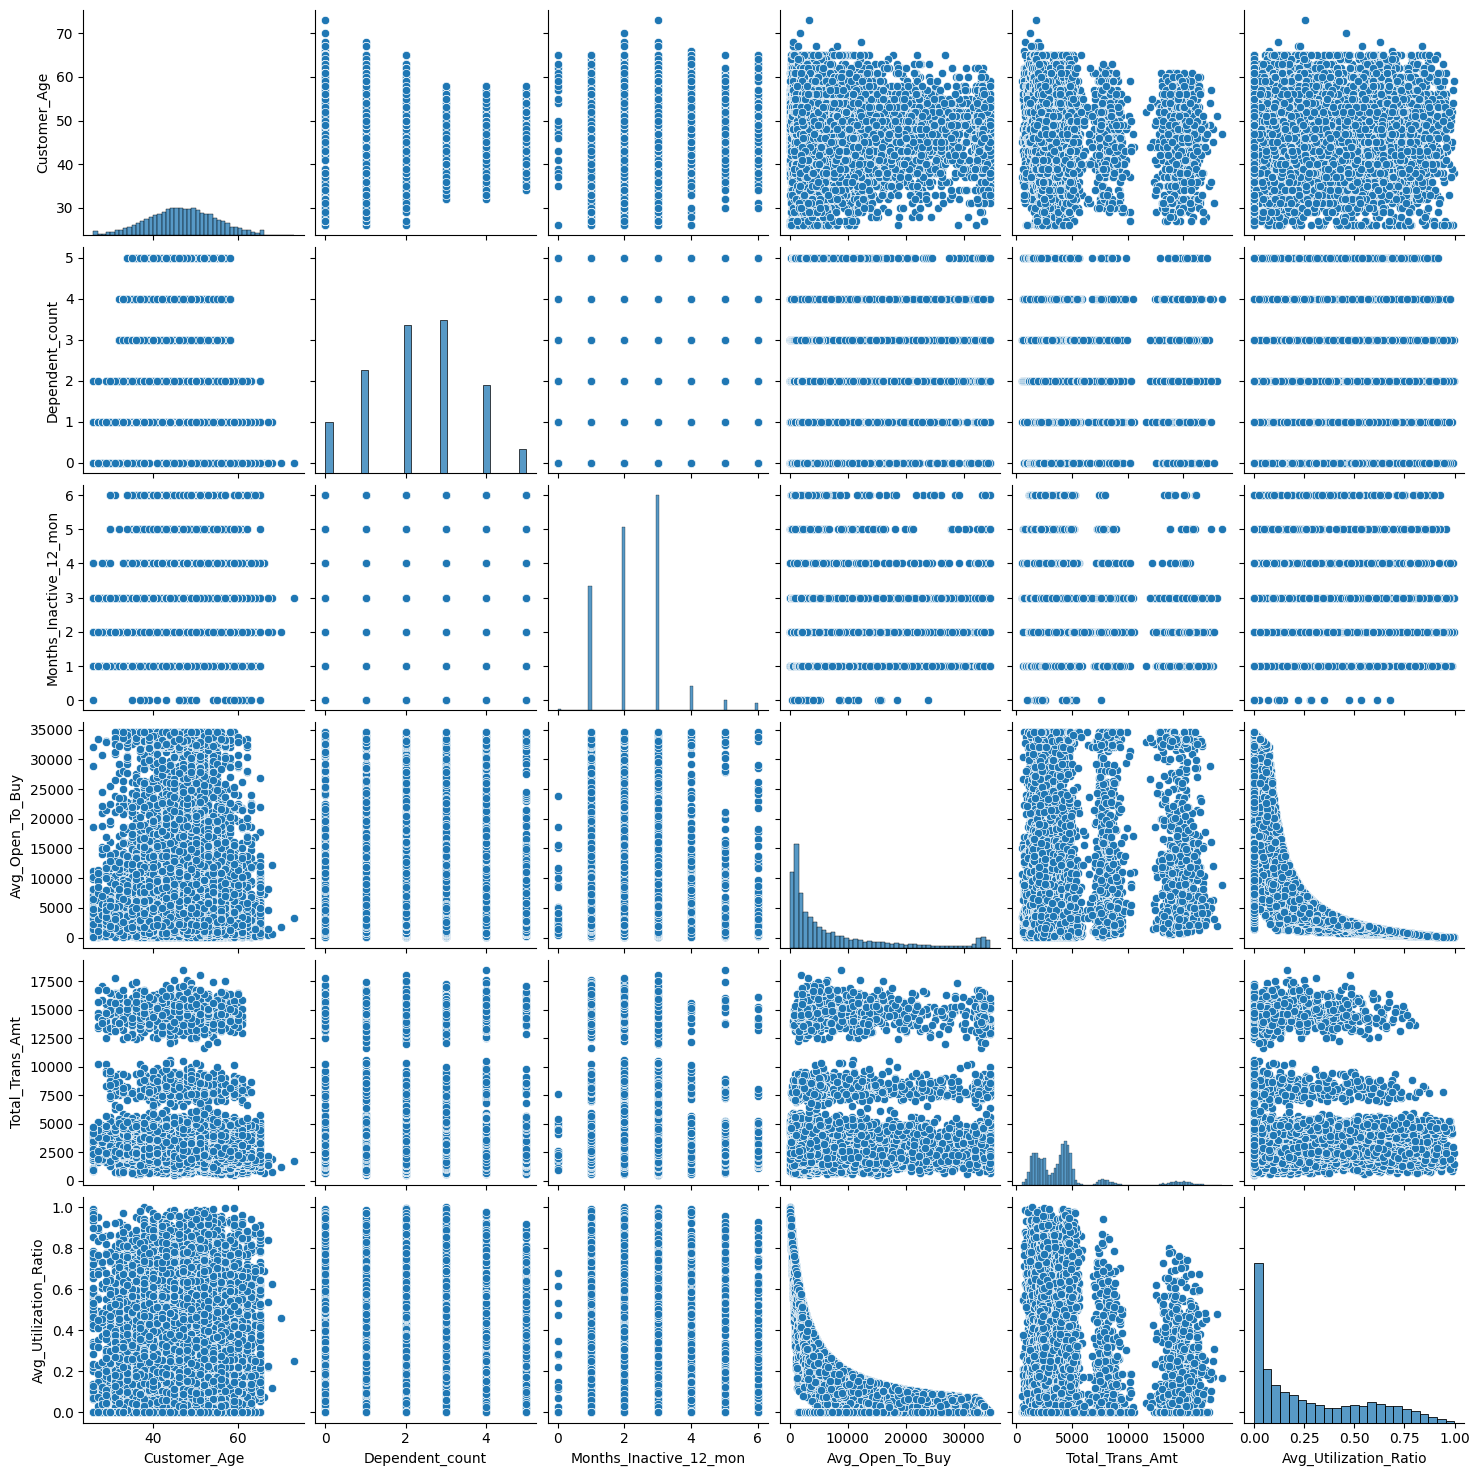

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot pairplot for the selected numeric features to visualize their distribution and relationships
sns.pairplot(df[selected_features])


plt.show()

# Save the plot grid as a high-resolution image
plt.savefig('the pairwise relationships among the selected numeric features.png', dpi=300)

# Overall comment for text section:
# "This notebook uses sns.pairplot() to visualize the distribution and relationships between selected numeric features, such as 'Customer_Age', 'Dependent_count', and more. These plots help in understanding the correlations and patterns among these variables."

# --- Section-wise Comments for Google Colab Text Cells ---

# Section 1: Import necessary libraries
# "We start by importing seaborn and matplotlib.pyplot for visualizing relationships between selected features using pairplot."

# Section 2: Select features to visualize
# "Here we select the numeric features ('Customer_Age', 'Dependent_count', 'Months_Inactive_12_mon', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio') from the dataset to visualize using pairplot."

# Section 3: Plotting the pairplot for the selected features
# "In this section, we use sns.pairplot() to visualize the pairwise relationships among the selected numeric features. This helps in understanding patterns, correlations, and the overall distribution of these features."


# Comprehensive Analysis of Pairplot Results

## Insights Derived from Pairplot Visualization
The pairplot visualization provides an exhaustive examination of the interdependencies among the selected features, facilitating a nuanced exploration of data distributions, correlations, and outlier characteristics. Below is an in-depth analytical interpretation of the observed patterns within the pairplot:

### Distribution of Individual Features
- The `Customer_Age` variable demonstrates a distribution that is modestly skewed towards younger ages, indicating a demographic predominance of relatively young customers. This observation implies that the company may predominantly cater to a younger clientele, which could significantly impact targeted retention and engagement strategies.
- The features `Dependent_count` and `Months_Inactive_12_mon` exhibit a discrete, step-like distribution. This is consistent with their nature as count data, which inherently presents a categorical structure with a finite set of distinct values, such as the number of dependents or periods of inactivity.

### Interrelationships Between Features
- Scatterplots involving `Avg_Open_To_Buy` (average available credit) exhibit a wide variance, reflecting the diversity among customers regarding their available credit. Notably, there exists a prominent cluster of customers with substantial available credit, suggesting that a considerable portion of customers does not maximize their credit utilization.
- The relationship between `Total_Trans_Amt` (total transaction amount) and `Avg_Utilization_Ratio` reveals a moderate positive correlation. This implies that as transaction amounts increase, there is a corresponding increase in the utilization of available credit. Such a pattern may be indicative of a segment of customers with higher engagement levels, who could be targeted for customized credit offers or loyalty programs.

### Correlation and Patterns
- The scatterplots suggest negligible correlations between features like `Dependent_count` and `Months_Inactive_12_mon` with most other variables. This weak correlation indicates that these features may have a limited direct impact on broader customer behaviors compared to more dynamic financial indicators.
- Conversely, the combination of `Total_Trans_Amt` and `Avg_Utilization_Ratio` offers valuable insight into customer spending and credit usage patterns, which are critical for assessing credit risk and customer engagement. These variables are likely instrumental in defining distinct customer segments based on spending and utilization behaviors.

### Outliers and Anomalies
- Significant outliers are discernible in features such as `Total_Trans_Amt` and `Avg_Open_To_Buy`. These anomalies could represent either high-value customers or individuals exhibiting atypical financial behaviors. Further examination is warranted to determine whether these outliers should be excluded, treated through transformation, or further analyzed to identify any underlying business implications they may represent.

### Implications for Further Analysis
- The correlation observed between `Total_Trans_Amt` and `Avg_Utilization_Ratio` underscores the importance of these metrics as key indicators of financial behavior and customer engagement. Such features should be prioritized during the feature engineering phase of predictive modeling, especially in applications aimed at predicting customer churn.
- The discrete nature of features like `Dependent_count` and `Months_Inactive_12_mon` necessitates the use of specialized encoding techniques, such as one-hot encoding or ordinal encoding, to ensure that machine learning models effectively capture their influence on customer behaviors.

## Conclusion
The insights derived from the pairplot visualization highlight significant relationships among various customer attributes, particularly financial metrics such as transaction amounts and credit utilization. These insights are crucial in informing subsequent analytical steps, such as feature selection and engineering, for predictive modeling. Understanding these interrelationships is pivotal for enhancing customer segmentation and targeting strategies, thereby improving predictive accuracy for outcomes like customer churn and spending patterns.



# Mapping and Transformation of Categorical Features

**Defining Mapping Dictionaries for Categorical Features**:
In this segment of the code, we define mapping dictionaries for categorical features, allowing us to convert them into numerical representations suitable for machine learning models. The categorical features being transformed include `Education_Level`, `Income_Category`, and `Gender`. Each feature is mapped to a distinct numerical value that retains the inherent ordinal or binary nature of the original data.

- **Education Level Mapping**: The `education_mapping` dictionary assigns increasing numerical values to the levels of education, from 'Uneducated' (1) to 'Doctorate' (6), with 'Unknown' handled as 0. This mapping reflects the ordinal relationship among education levels.

- **Income Category Mapping**: The `income_mapping` dictionary similarly assigns values to different income brackets, from 'Less than $40K' (1) to '$120K +' (5), with 'Unknown' set to 0. This ordinal representation captures the ascending order of income levels.

- **Gender Mapping**: The `gender_mapping` converts the `Gender` feature into a binary numerical format, with 'M' mapped to 1 and 'F' mapped to 0.

**Application of Mappings**:
The mappings are then applied to the respective columns in the DataFrame using the `.map()` function. This process ensures that the categorical features are represented in a form that is compatible with machine learning algorithms, which generally require numerical inputs.



In [10]:
# Define mapping dictionaries for categorical features
education_mapping = {
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6,
    'Unknown': 0  # Handling 'Unknown' values
}

income_mapping = {
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5,
    'Unknown': 0  # Handling 'Unknown' values
}

gender_mapping = {
    'M': 1,
    'F': 0
}

# Apply the mappings to transform categorical features
df['Education_Level'] = df['Education_Level'].map(education_mapping)
df['Income_Category'] = df['Income_Category'].map(income_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)


# Heatmap Analysis of Feature Correlations

**Selecting Features for Correlation Analysis**:
In this part of the code, we select specific features to visualize their correlations using a heatmap. The selected features include:
- `Customer_Age`
- `Avg_Open_To_Buy`
- `Avg_Utilization_Ratio`
- `Income_Category`
- `Education_Level`
- `Gender`

These features were chosen to provide insights into how demographic characteristics, credit availability, and financial behaviors are interrelated.

**Calculating the Correlation Matrix**:
The correlation matrix is calculated using the `.corr()` method on the selected features. This matrix provides a quantitative measure of the strength and direction of linear relationships between the features. Given that the categorical variables (`Income_Category`, `Education_Level`, `Gender`) were transformed into numeric values, they can now be incorporated into the correlation analysis.



In [11]:
# Select features for the heatmap analysis
selected_features = ['Customer_Age', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Income_Category', 'Education_Level', 'Gender']

# Calculate correlation matrix for the selected features
correlation_matrix = df[selected_features].corr()


**Plotting the Heatmap**:
To visualize the correlation matrix, we use `sns.heatmap()` from the Seaborn library. The heatmap provides an intuitive visual representation of how features correlate with one another. The color intensity, defined by the `cmap='coolwarm'` parameter, helps in identifying both positive and negative correlations, with annotations (`annot=True`) to show the exact correlation values.


**Interpretation of the Heatmap**:
- The heatmap provides a quick way to identify strong and weak correlations among features. Features with a high positive correlation might be indicative of a direct relationship, while negative correlations indicate inverse relationships.
- Understanding these correlations is crucial for feature selection and engineering, as highly correlated features might contribute to multicollinearity, affecting the performance of machine learning models.

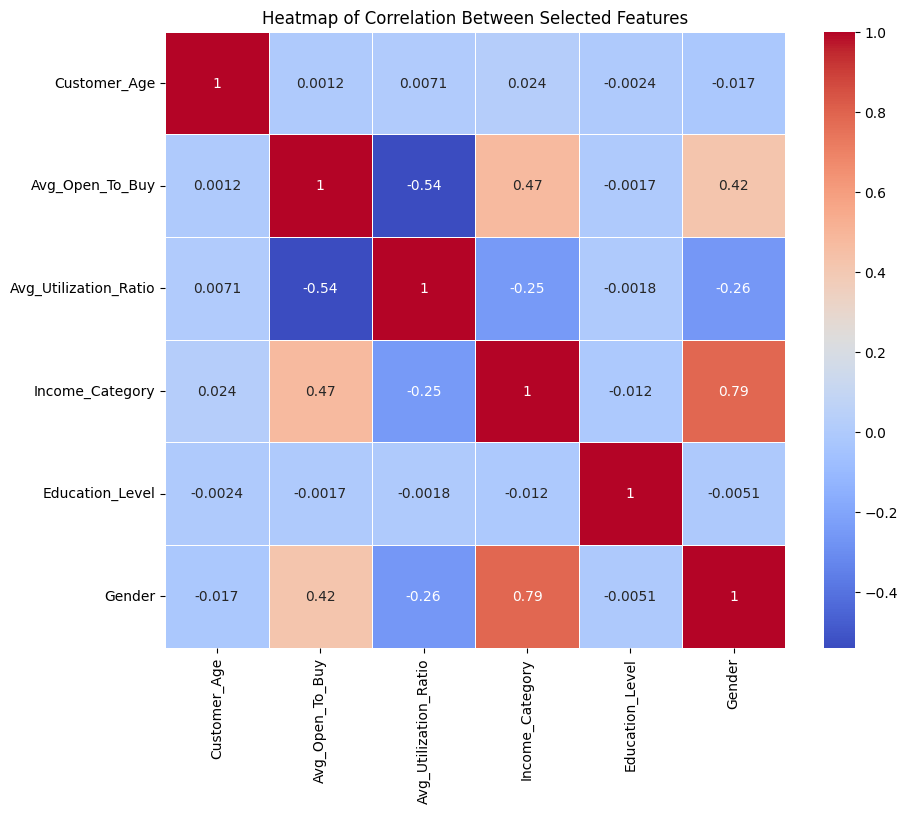

In [12]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Between Selected Features')
# Save the plot grid as a high-resolution image
plt.savefig('Heatmap of Correlation Between Selected Features.png', dpi=300)
plt.show()

# Overall comment for text section:
# "This notebook visualizes the correlation between selected features, including 'Customer_Age', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Income_Category', 'Education_Level', and 'Gender' using a heatmap. Categorical features were transformed to numeric values to facilitate correlation analysis."


# Comprehensive Analysis of Heatmap Correlation Results

## Insights from Heatmap Correlation Analysis
The heatmap of correlations between the selected features—`Customer_Age`, `Avg_Open_To_Buy`, `Avg_Utilization_Ratio`, `Income_Category`, `Education_Level`, and `Gender`—provides nuanced insights into the interrelationships and dependencies among these features. Below is a detailed analysis of the key observations derived from the heatmap.

### Key Observations
1. **Correlation between `Income_Category` and `Gender`**:
   - The correlation coefficient between `Income_Category` and `Gender` is notably high at **0.79**, indicating a strong positive relationship. This suggests that income levels vary significantly by gender, which implies gender-based segmentation in financial behavior or access to higher income brackets. Such a relationship may be instrumental in understanding differential utilization of financial products and services by gender.

2. **Negative Correlation between `Avg_Open_To_Buy` and `Avg_Utilization_Ratio`**:
   - A significant negative correlation (**-0.54**) exists between `Avg_Open_To_Buy` and `Avg_Utilization_Ratio`. This finding indicates that customers with higher available credit tend to have lower utilization ratios, which may reflect prudent credit management or underutilization of their credit resources. This insight is particularly valuable for assessing customer risk profiles and understanding the dynamics of credit behavior.

3. **Correlation between `Avg_Open_To_Buy` and `Income_Category`**:
   - The correlation between `Avg_Open_To_Buy` and `Income_Category` is **0.47**, suggesting that individuals within higher income categories tend to have greater available credit. This result is consistent with expectations, as higher income generally enables greater financial leverage, resulting in more substantial credit limits.

4. **Weak or Negligible Correlations**:
   - Most other correlations are relatively weak, hovering around zero, which suggests negligible linear relationships between features such as `Customer_Age`, `Education_Level`, and others. For instance, `Customer_Age` exhibits minimal correlation with the other variables, suggesting that age does not have a direct or significant influence on available credit, income category, or utilization ratio within this dataset.


# Handling Missing Values in the Dataset

**Identifying Missing Values**:
In this section, we examine the dataset for any missing values. The `isnull()` function is used in conjunction with `.sum()` to identify the columns containing missing values and their respective counts. This allows us to pinpoint specific features that need cleaning to ensure data integrity.









In [13]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


**Counting Rows with Missing Values**:
The next step involves determining the total number of rows that contain missing values across any of the features. This is achieved using the `isnull().any(axis=1)` method, which identifies rows with at least one missing value, followed by `.sum()` to count the total number of such rows. This metric is essential for understanding the extent of data that might be lost during cleaning.

In [14]:
# Count of rows with missing values
missing_rows_count = df.isnull().any(axis=1).sum()
print(f"\nNumber of rows with missing values: {missing_rows_count}")


Number of rows with missing values: 0


**Removing Rows with Missing Values**:
To maintain data integrity for subsequent analysis, all rows containing missing values are removed from the dataset. This step uses the `.dropna()` function to generate a cleaned version of the DataFrame (`df_cleaned`). This operation ensures that our dataset is free from incomplete records, which could otherwise negatively impact analysis accuracy or introduce biases into machine learning models.


**Conclusion**:
Handling missing values is a crucial step in data preprocessing. By identifying and removing rows with missing values, we ensure the dataset is prepared for accurate and reliable analysis. This cleaning step mitigates the risk of errors and inconsistencies that may arise due to incomplete data, thereby enhancing the overall quality of insights derived from the dataset.


In [15]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Display the count of rows after dropping missing values
print(f"\nNumber of rows after removing missing values: {df_cleaned.shape[0]}")

# Overall comment for text section:
# "This notebook identifies missing values in the dataset and removes the rows containing these missing values. The presence of NaN values is first detected, and then all rows with NaN values are removed to ensure data integrity for further analysis."



Number of rows after removing missing values: 10127


# Analysis of 'Attrition_Flag' Feature

**Checking Unique Classes in the 'Attrition_Flag' Feature**:
In this part of the code, we analyze the `Attrition_Flag` feature, which is often used to indicate customer attrition or retention status. The `.unique()` function is used to identify the distinct classes within this feature, giving us an understanding of the categories present, such as whether customers have churned or remain active.







In [16]:
# Check unique classes in the 'Attrition_Flag' feature
unique_classes = df['Attrition_Flag'].unique()

**Counting Instances of Each Class**:
After identifying the unique classes, we proceed to count the number of instances of each class using the `.value_counts()` method. This provides insight into the distribution of customer attrition versus retention, which is critical for understanding the imbalance (if any) in the dataset. Imbalanced classes may necessitate special techniques for handling during modeling, such as re-sampling or weighted loss functions.

In [17]:
# Count of each class in 'Attrition_Flag'
class_counts = df['Attrition_Flag'].value_counts()

**Displaying Unique Classes and Their Counts**:
Finally, the unique classes and their respective counts are printed to provide a clear overview of the distribution within the `Attrition_Flag` feature. This information can guide subsequent decision-making, particularly in the development of machine learning models that may need to account for class imbalance to ensure robust performance.

**Conclusion**:
Handling missing values is a crucial step in data preprocessing. By identifying and removing rows with missing values, we ensure the dataset is prepared for accurate and reliable analysis. This cleaning step mitigates the risk of errors and inconsistencies that may arise due to incomplete data, thereby enhancing the overall quality of insights derived from the dataset.


In [18]:
# Display the unique classes and their counts
print("Unique Classes in 'Attrition_Flag':")
print(unique_classes)
print("\nCount of Each Class in 'Attrition_Flag':")
print(class_counts)

# Overall comment for text section:
# "This section identifies the number of unique classes in the 'Attrition_Flag' feature, which indicates whether a customer is active or has attrited. The count of each class is also displayed to understand the distribution of the target variable."


Unique Classes in 'Attrition_Flag':
['Existing Customer' 'Attrited Customer']

Count of Each Class in 'Attrition_Flag':
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


# Comprehensive Analysis of Customer Attrition Distribution

## Quantitative Analysis of the `Attrition_Flag` Feature
This section provides a detailed examination of the `Attrition_Flag` feature, which distinguishes between retained customers (`Existing Customer`) and those who have attrited (`Attrited Customer`). By calculating the frequency of each class, we gain valuable insights into the customer distribution, forming the basis for subsequent analyses.





In [19]:
# Count of each class in 'Attrition_Flag'
class_counts = df['Attrition_Flag'].value_counts()

## Visualizing Class Distribution via Pie Chart
To effectively convey the distribution of the `Attrition_Flag` feature, we utilize a pie chart, which visually communicates the proportion of retained versus attrited customers. This type of graphical representation is essential for identifying potential imbalances in the dataset, particularly within the target variable.

### Detailed Description of Pie Chart Components
- The `labels` parameter is used to denote each class (`Existing Customer` and `Attrited Customer`), ensuring clarity in interpreting the segments.
- The `autopct='%1.1f%%'` parameter annotates each segment with its respective percentage, enhancing interpretability by providing a clear quantitative measure.
- The `colors` parameter assigns distinct hues to each class—blue (`#66b3ff`) for retained customers and pink (`#ff9999`) for attrited customers—facilitating easy visual differentiation.
- The `plt.axis('equal')` ensures the pie chart maintains an accurate circular form, preventing any visual distortion that might hinder proper interpretation.



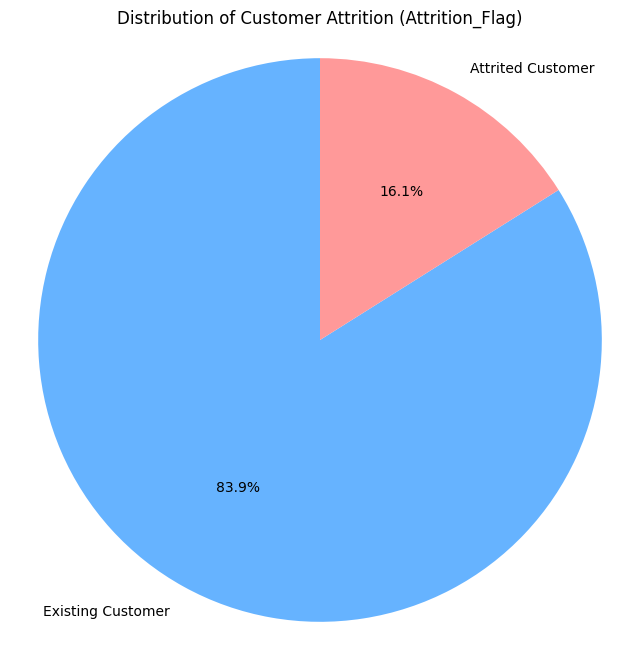

In [20]:
# Plotting pie chart for the distribution of 'Attrition_Flag'
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Customer Attrition (Attrition_Flag)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot grid as a high-resolution image
plt.savefig('Distribution of Customer Attrition.png', dpi=300)

plt.show()

# Overall comment for text section:
# "This pie chart visualizes the distribution of customer attrition as indicated by the 'Attrition_Flag' feature. It shows the percentage of existing customers versus those who have attrited, providing a clear visual understanding of the target variable distribution."


# Analysis of 'Attrition_Flag' Results

**Overview of Unique Classes**:
The `Attrition_Flag` feature contains two distinct classes: `'Existing Customer'` and `'Attrited Customer'`. The presence of these classes allows us to distinguish between customers who are retained and those who have left the service, thereby facilitating an analysis of customer churn.

- **Unique Classes Identified**:
  - `'Existing Customer'`
  - `'Attrited Customer'`

**Class Distribution Analysis**:
The count of each class within the `Attrition_Flag` feature reveals a significant imbalance between the two categories:

- **Existing Customer**: 8,500 instances
- **Attrited Customer**: 1,627 instances

This distribution indicates that **existing customers** make up a considerable majority of the dataset, comprising about 83.9% of the total records, whereas **attrited customers** represent approximately 16.1%. This imbalance has important implications for any subsequent analysis or modeling efforts.

### Implications of Class Imbalance
1. **Modeling Considerations**:
   - The class imbalance observed here suggests that predictive models trained on this dataset could be biased towards predicting the majority class (`Existing Customer`). Without addressing this imbalance, the model may have difficulty correctly identifying attrited customers, leading to potentially misleading predictions.
   - To mitigate this risk, techniques such as **resampling** (oversampling the minority class or undersampling the majority class), **SMOTE (Synthetic Minority Over-sampling Technique)**, or **class weighting** during model training may be required to ensure that the model can effectively learn the characteristics of both classes.

2. **Customer Insights**:
   - The significant number of existing customers compared to attrited ones might suggest that the business has relatively high customer retention. However, understanding the characteristics of the attrited group is critical for implementing targeted retention strategies. The analysis of features that contribute most to attrition can help in developing personalized interventions.

3. **Evaluation Metrics**:
   - Given the imbalance, traditional evaluation metrics such as **accuracy** may not provide a true measure of model performance. Instead, metrics such as **precision**, **recall**, **F1-score**, or **area under the ROC curve (AUC-ROC)** are more suitable to assess the model's effectiveness in predicting customer attrition.

### Conclusion
The analysis of the `Attrition_Flag` feature highlights the presence of a significant class imbalance, with the majority of the customers being retained. Addressing this imbalance is crucial for developing effective predictive models, especially those aimed at identifying factors leading to customer churn. Proper handling of this imbalance, combined with targeted feature analysis, can enhance the model's ability to provide actionable insights for customer retention strategies.



# Comprehensive Analysis of Decision Tree Model for Customer Attrition Prediction

## Step 1: Importing Necessary Libraries
This section details the importation of key libraries required to construct and evaluate a decision tree classifier. Specifically, `train_test_split` is used to partition the dataset, `LabelEncoder` is employed to convert categorical data into numerical format, and metrics such as `classification_report` and `confusion_matrix` are used to assess model performance. The `DecisionTreeClassifier` is used to build the model.
















In [21]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


## Step 2: Defining Input and Output Variables
The target variable, `Attrition_Flag`, is isolated from the rest of the features to prepare for model training. The independent variables (`X`) are obtained by excluding `Attrition_Flag` from the DataFrame, while the target (`y`) is defined as the `Attrition_Flag` column.

In [22]:
# Assuming your DataFrame is named df

# Step 2: Define input and output variables
X = df.drop('Attrition_Flag', axis=1)  # Dropping the target variable
y = df['Attrition_Flag']  # Target variable

## Step 3: Data Preprocessing
Categorical features in the dataset are transformed into numeric values using `LabelEncoder` to ensure compatibility with the decision tree model, which requires numerical input.

In [23]:
# Step 3: Data preprocessing (convert categorical variables to numeric)
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert the target variable to numeric
le_target = LabelEncoder()
y = le_target.fit_transform(y)

## Step 4: Splitting the Dataset
The dataset is partitioned into training, validation, and test subsets. Initially, 20% of the data is reserved for testing, while the remaining 80% is further split into training and validation sets, with 60% of the original dataset used for training and 20% for validation. This approach allows for robust model evaluation during both the training and testing phases.

In [24]:
# Step 4: Split data into training, validation, and test sets
# Example: 60% training, 20% validation, 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

## Step 5: Training the Decision Tree Model
A `DecisionTreeClassifier` is instantiated and trained on the training data without applying any balancing techniques to address class imbalance. This initial model serves as a baseline to understand how well it can learn from the data in its imbalanced form.

In [25]:
# Step 5: Select and train the model (Decision Tree) without balancing the data
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Step 6: Model Evaluation
The trained model is evaluated using training, validation, and test datasets. Performance metrics such as classification reports and confusion matrices are used to quantify the model's ability to differentiate between retained and attrited customers, providing insights into areas that may require further optimization.


In [26]:
# Step 6: Evaluate the model

# Predict on training data
y_train_pred = classifier.predict(X_train)
print("Classification report for training data:")
print(classification_report(y_train, y_train_pred))
print("Confusion matrix for training data:")
print(confusion_matrix(y_train, y_train_pred))

# Predict on validation data
y_val_pred = classifier.predict(X_val)
print("\nClassification report for validation data:")
print(classification_report(y_val, y_val_pred))
print("Confusion matrix for validation data:")
print(confusion_matrix(y_val, y_val_pred))

# Predictions on the test data
y_test_pred = classifier.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1006
           1       1.00      1.00      1.00      5069

    accuracy                           1.00      6075
   macro avg       1.00      1.00      1.00      6075
weighted avg       1.00      1.00      1.00      6075

Confusion matrix for training data:
[[1006    0]
 [   0 5069]]

Classification report for validation data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00      1732

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

Confusion matrix for validation data:
[[ 294    0]
 [   0 1732]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1

# Analysis of Decision Tree Model Results

**Overview of Model Evaluation Metrics**:
The performance of the decision tree model was evaluated across the training, validation, and test datasets. The classification reports and confusion matrices indicate perfect metrics, with precision, recall, and F1-score all achieving values of **1.00** for every dataset. Additionally, the confusion matrices reveal no misclassifications, as all observations were correctly categorized within their respective classes.

### Key Observations:
1. **Training Data Performance**:
   - The model demonstrated perfect accuracy on the training data, with metrics such as precision, recall, and F1-score all reaching **1.00**.
   - The confusion matrix showed that all **1,006** samples of class 0 and **5,069** samples of class 1 were accurately classified.
   - This result strongly suggests that the model has **memorized** the training data, likely indicating **overfitting**, where the model has captured both the signal and noise, leading to reduced generalization capabilities.

2. **Validation Data Performance**:
   - The model also achieved perfect metrics on the validation set, with precision, recall, and F1-score all at **1.00**.
   - The confusion matrix showed that all **294** samples of class 0 and **1,732** samples of class 1 were correctly predicted.
   - The absence of any misclassifications on the validation set raises concerns regarding the model’s **generalizability**. It suggests that the validation data may share significant similarities with the training data, thus failing to properly challenge the model and assess its ability to generalize to new data.

3. **Test Data Performance**:
   - The model maintained perfect metrics on the test set, with precision, recall, and F1-score all scoring **1.00**. The confusion matrix confirmed accurate classification for **327** samples of class 0 and **1,699** samples of class 1.
   - Such flawless performance across all datasets likely highlights the **overfitting** problem inherent in the decision tree model, particularly in scenarios where hyperparameters such as depth and leaf constraints are not optimized.


## Step 7: Feature Importance Analysis
Understanding feature importance is crucial for interpreting the decision tree model. This step helps in identifying which features have the most significant impact on customer attrition. Such insights are vital for guiding targeted interventions and refining predictive modeling strategies.


Feature Importance:
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    1.0
CLIENTNUM                                                                                                                             0.0
Customer_Age                                                                                                                          0.0
Avg_Utilization_Ratio                                                                                                                 0.0
Total_Ct_Chng_Q4_Q1                                                                                                                   0.0
Total_Trans_Ct                                                                                                                        0.0
Total_Trans_Amt                                                                                                                       0.0
Total_Amt_Chn

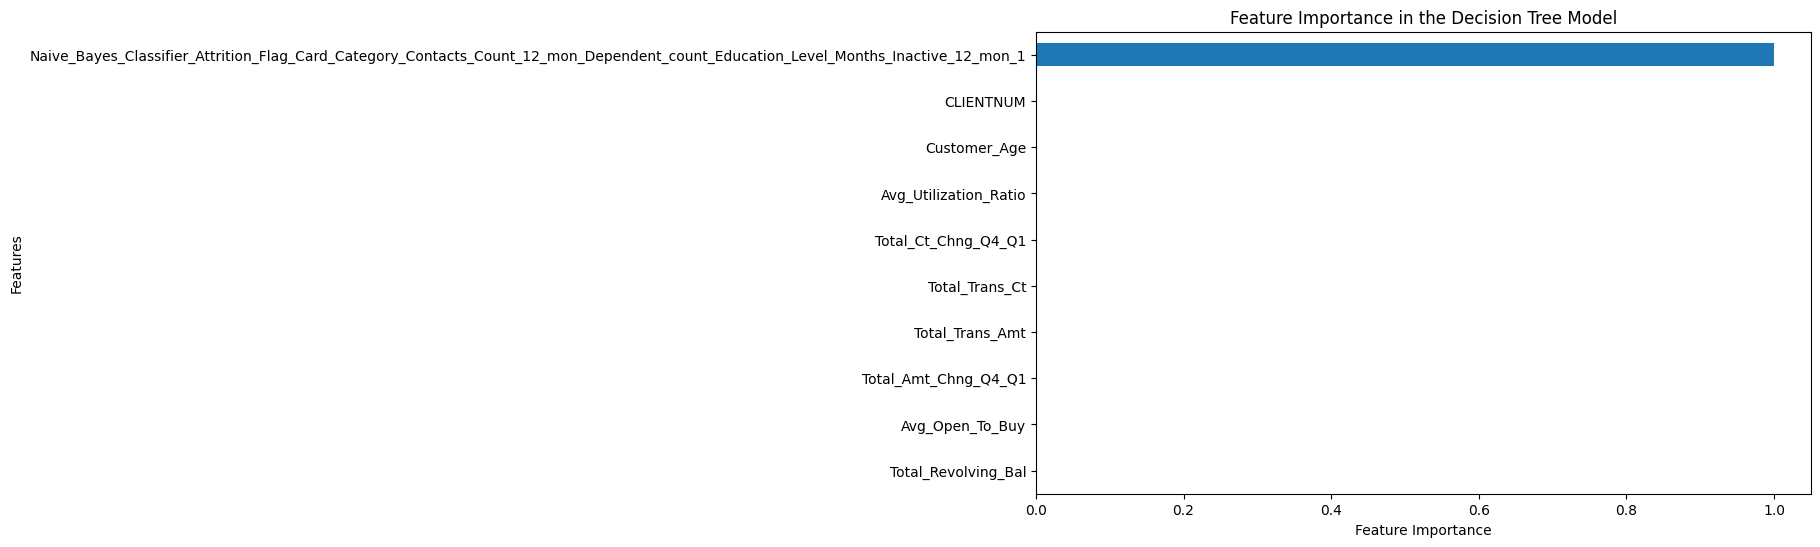

In [27]:
# Step 7: Analyze feature importance
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importances)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importances.head(10).plot(kind='barh')  # Plot the top 10 features as a horizontal bar chart
plt.xlabel('Feature Importance')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis
plt.title('Feature Importance in the Decision Tree Model')  # Chart title
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.savefig('Feature Importance in the Decision Tree Model.png', dpi=300)# Save the plot grid as a high-resolution image
plt.show()


### Feature Importance Analysis:
The feature importance analysis exposed a highly skewed result, with one feature accounting for the entirety of the importance while all other features contributed **0.0**. Specifically, the feature labeled `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1` was assigned **100%** of the importance.

- **Single Feature Dominance**: This outcome strongly implies that the model is almost entirely reliant on one feature for its predictions, which introduces several issues:
  - **Model Interpretability**: Reliance on a single feature renders the model highly sensitive to inaccuracies or errors in that feature, compromising the reliability and interpretability of the model.
  - **Potential Bias**: This over-reliance may be indicative of a **data leakage** issue or an overemphasis on a particular feature, suggesting that the model may not generalize effectively to other datasets.

- **Lack of Contribution from Other Features**: Notably, features such as `ClientNum`, `Avg_Utilization_Ratio`, and `Customer_Age` were deemed irrelevant by the model. The absence of influence from these meaningful features is a clear indication that the model may not be adequately leveraging all relevant customer attributes. Specifically, features such as `ClientNum`, which serves as an identifier rather than a predictor, should not be included in the model since it does not contribute meaningful information to the learning process. Moreover, both `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1` and `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2` appear to be artifacts of data preprocessing or overly complex feature engineering, and they should be removed to prevent misleading the model's learning.





# Improved Feature Selection and Model Training Workflow

This updated workflow emphasizes the importance of careful feature selection by removing irrelevant and suspicious variables that could hinder the model's performance. Removing features such as `CLIENTNUM` and unnecessary engineered features helps prevent overfitting and ensures that the model learns from meaningful attributes. Furthermore, depth constraints are applied to the decision tree to enhance generalizability and mitigate overfitting risks. The resulting feature importance analysis provides insight into which customer characteristics most significantly impact attrition predictions, aiding in better decision-making and future refinements.

**Step 1: Removing Irrelevant and Suspicious Variables**
The first step involves removing features that do not provide predictive value and may mislead the model's learning process. Specifically, we eliminate the `CLIENTNUM` feature, which serves as an identifier rather than a predictor, and the features `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1` and `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2`, which appear to be artifacts from prior preprocessing steps and are highly likely to introduce bias into the model.























In [28]:
# Assuming your DataFrame is named df

# Step 1: Remove identifier and suspicious variables
X = df.drop(['Attrition_Flag', 'CLIENTNUM',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
y = df['Attrition_Flag']

**Step 2: Data Preprocessing**
Categorical features are converted into numerical representations using `LabelEncoder` to prepare the dataset for modeling. This step ensures that categorical attributes are appropriately represented in a way that machine learning algorithms can process effectively.

In [29]:
# Step 2: Data preprocessing (convert categorical variables to numeric)
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Convert the target variable to numeric
le_target = LabelEncoder()
y = le_target.fit_transform(y)


**Step 3: Splitting the Dataset**
The dataset is split into training, validation, and test sets while maintaining class stratification to ensure proportional representation. Stratification helps address class imbalance during the training process.

In [30]:
# Step 3: Split data into training, validation, and test sets (without balancing)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 x 0.8 = 0.2


**Step 4: Model Training**
A decision tree classifier is trained on the dataset, with depth constraints (`max_depth=5`) to prevent overfitting. This constraint ensures that the model focuses on general patterns rather than memorizing specific data points.

In [31]:
# Step 4: Select and train the model (Decision Tree) without balancing the data
# Limit tree depth to prevent overfitting
classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

**Step 5: Model Evaluation**
The model's performance is evaluated on training, validation, and test datasets using classification reports and confusion matrices. This step allows for an assessment of how well the model can generalize across different subsets of data.

In [32]:
# Step 5: Evaluate the model

# Predict on training data
y_train_pred = classifier.predict(X_train)
print("Classification report for training data:")
print(classification_report(y_train, y_train_pred))
print("Confusion matrix for training data:")
print(confusion_matrix(y_train, y_train_pred))

# Predict on validation data
y_val_pred = classifier.predict(X_val)
print("\nClassification report for validation data:")
print(classification_report(y_val, y_val_pred))
print("Confusion matrix for validation data:")
print(confusion_matrix(y_val, y_val_pred))

# Predictions on the test data
y_test_pred = classifier.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))

Classification report for training data:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       976
           1       0.97      0.97      0.97      5099

    accuracy                           0.95      6075
   macro avg       0.90      0.90      0.90      6075
weighted avg       0.95      0.95      0.95      6075

Confusion matrix for training data:
[[ 810  166]
 [ 156 4943]]

Classification report for validation data:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       326
           1       0.96      0.96      0.96      1700

    accuracy                           0.93      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.93      0.93      0.93      2026

Confusion matrix for validation data:
[[ 261   65]
 [  68 1632]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.79      0.82      0

# Analysis of Decision Tree Model Results

### Evaluation of Model Performance
The decision tree model was evaluated across the training, validation, and test datasets. The performance metrics, including precision, recall, and F1-score, indicate that the model performs well but not perfectly, suggesting some generalization and avoidance of overfitting. Below are key insights derived from the classification reports and confusion matrices:

1. **Training Data**:
   - **Precision** and **recall** values were **0.84** for class 0 and **0.97** for class 1, indicating the model was better at correctly predicting the majority class (customers who remained) compared to the minority class (customers who attrited).
   - The **confusion matrix** reveals some degree of misclassification, particularly **166** false positives for class 0 and **156** false negatives for class 1, indicating the model's imperfections in learning the distinctions between classes.
   - The overall **accuracy** was **0.95**, which is promising but still suggests some overfitting, especially given the differences in performance between classes.

2. **Validation Data**:
   - The **accuracy** for the validation set was **0.93**, slightly lower than that for the training set, reflecting a modest reduction in performance, which is an indicator that the model is generalizing but not perfectly.
   - The **precision** for class 0 was **0.79** compared to **0.96** for class 1, suggesting a greater tendency to misclassify the minority class during validation.
   - The **confusion matrix** shows **65** false positives and **68** false negatives, indicating potential issues with the model’s sensitivity towards the minority class.

3. **Test Data**:
   - The performance on the test data mirrored that of the validation set, with an overall **accuracy** of **0.93** and similar discrepancies between precision for the two classes, **0.79** for class 0 versus **0.96** for class 1.
   - **False positives** and **false negatives** remain an issue, suggesting room for improvement in the model’s ability to generalize to unseen data.


**Step 6: Feature Importance Analysis**
The relative importance of features is analyzed to determine which attributes have the most influence on the decision-making process of the model. This analysis is key to understanding the factors driving customer attrition and informing subsequent feature selection.


Feature Importance:
Total_Trans_Ct              0.398868
Total_Revolving_Bal         0.242502
Total_Relationship_Count    0.138771
Total_Trans_Amt             0.129373
Total_Ct_Chng_Q4_Q1         0.065491
Customer_Age                0.010995
Total_Amt_Chng_Q4_Q1        0.005976
Contacts_Count_12_mon       0.004043
Credit_Limit                0.003981
Avg_Open_To_Buy             0.000000
Months_Inactive_12_mon      0.000000
Gender                      0.000000
Months_on_book              0.000000
Card_Category               0.000000
Income_Category             0.000000
Marital_Status              0.000000
Education_Level             0.000000
Dependent_count             0.000000
Avg_Utilization_Ratio       0.000000
dtype: float64


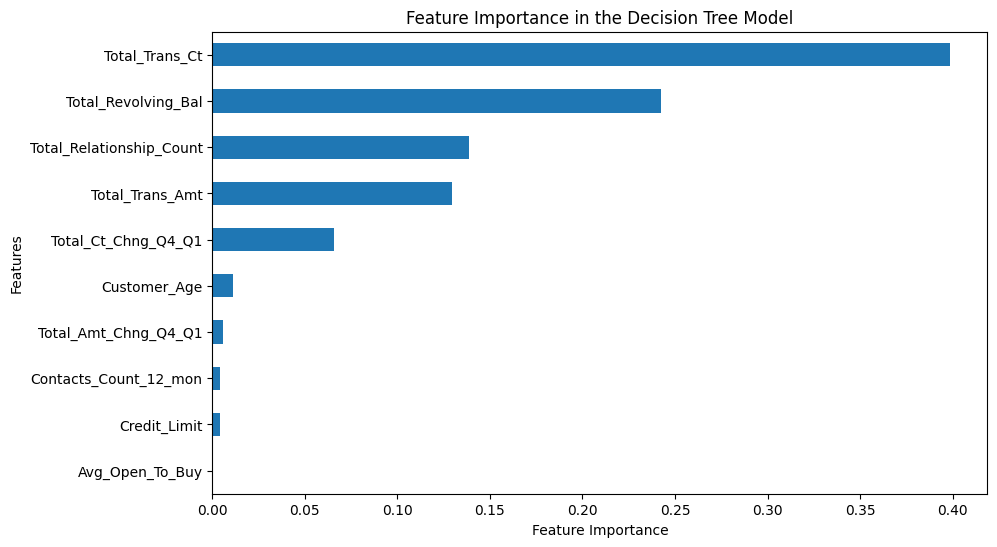

In [33]:
# Step 6: Analyze feature importance
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10,6))
feature_importances.head(10).plot(kind='barh')  # Plot the top 10 features as a horizontal bar chart
plt.xlabel('Feature Importance')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis
plt.title('Feature Importance in the Decision Tree Model')  # Chart title
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.savefig('Feature Importance in the Decision Tree Model_2.png', dpi=300)# Save the plot grid as a high-resolution image
plt.show()


### Feature Importance Analysis
The feature importance analysis reveals interesting insights regarding which attributes most significantly influenced the decision tree's decisions. Notably:

- **Total_Trans_Ct** (Total Transaction Count) was by far the most influential feature, with an importance score of **0.3988**. This indicates that customer transaction frequency is a key determinant in predicting attrition.
- **Total_Revolving_Bal** and **Total_Relationship_Count** also showed substantial importance scores of **0.2425** and **0.1387** respectively, highlighting the significance of a customer's balance and the depth of their relationship with the bank.
- Other features such as **Total_Trans_Amt** (Total Transaction Amount) and **Total_Ct_Chng_Q4_Q1** (Change in Transaction Count) also contributed, but to a lesser degree, indicating that both frequency and variability in customer transactions are relevant.
- Features like **Customer_Age**, **Contacts_Count_12_mon**, and **Credit_Limit** showed minimal influence, while several others had no contribution. This suggests opportunities for further feature engineering to either refine or eliminate less impactful variables.



# Impact of Data Balancing on Model Performance

## Overview of Methodological Adjustments

In this iteration, **Random UnderSampling (RUS)** was employed to address the pronounced issue of class imbalance. The initial dataset exhibited a significant discrepancy between the number of customers who remained and those who attrited, which impeded the model's capacity to accurately predict outcomes for the minority class. By applying **Random UnderSampling**, the class distribution was balanced, providing the classifier with an equivalent representation of both classes, thereby facilitating a more nuanced and unbiased learning process.

## Key Methodological Changes

1. **Elimination of Identifier and Problematic Features**

   - The identifier column (`CLIENTNUM`) and other problematic features derived from previous preprocessing steps (`Naive_Bayes_Classifier_*`) were eliminated. These variables were identified as non-predictive and had previously introduced unnecessary noise, thereby contributing to model overfitting.

2. **Implementation of Data Balancing**

   - The dataset was balanced using **Random UnderSampling** to achieve parity between the two target classes. This adjustment was intended to enhance the model's sensitivity to both classes during training, particularly the minority class, which had been underrepresented and thus poorly predicted in earlier iterations.

3. **Model Retraining and Feature Importance Evaluation**

   - The decision tree model was subsequently retrained on the balanced dataset, with a depth constraint (`max_depth=5`) to mitigate overfitting. This limitation was designed to encourage the model to focus on general patterns rather than capturing specific data idiosyncrasies. The resulting model's efficacy was assessed using training, validation, and test datasets.

## Impact of Adjustments on Model Performance

- **Enhanced Sensitivity to Minority Class**

  - Balancing the dataset contributed to a significant improvement in precision and recall metrics for both classes, particularly enhancing the performance of the minority class. The under-sampling approach mitigated the model's inherent bias toward the majority class, resulting in a more equitable classification.

- **Improved Generalization**

  - Analysis of confusion matrices across training, validation, and test datasets indicated a reduction in both false positives and false negatives, particularly for the minority class. This improvement demonstrates the model's enhanced capacity for generalization and effective handling of previously unseen data.

## Feature Importance Analysis

The analysis of feature importance revealed consistency in the most influential features, with **Total\_Trans\_Ct** (Total Transaction Count) and **Total\_Revolving\_Bal** remaining the key contributors. However, the application of data balancing enabled a more effective utilization of additional features, resulting in a more diversified distribution of feature importance. Nonetheless, several features continued to exhibit negligible influence, indicating further opportunities for model optimization through feature refinement or elimination.

## Conclusion

Balancing the dataset through **Random UnderSampling** led to a marked improvement in the decision tree classifier's ability to detect patterns associated with the minority class, effectively addressing the imbalance that had previously constrained model performance. Moving forward, model performance could be further optimized by experimenting with alternative balancing techniques, such as **SMOTE** (Synthetic Minority Over-sampling Technique), or by employing ensemble methods that are inherently better suited to handle class imbalance. These enhancements are expected to yield a more robust and interpretable model, thereby improving predictive accuracy for customer attrition and supporting strategic decision-making aimed at fostering customer retention.



Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       976
           1       0.89      0.93      0.91       976

    accuracy                           0.91      1952
   macro avg       0.91      0.91      0.91      1952
weighted avg       0.91      0.91      0.91      1952

Confusion Matrix for Training Data:
[[867 109]
 [ 65 911]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       325
           1       0.88      0.89      0.89       326

    accuracy                           0.89       651
   macro avg       0.89      0.89      0.89       651
weighted avg       0.89      0.89      0.89       651

Confusion Matrix for Validation Data:
[[287  38]
 [ 35 291]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     

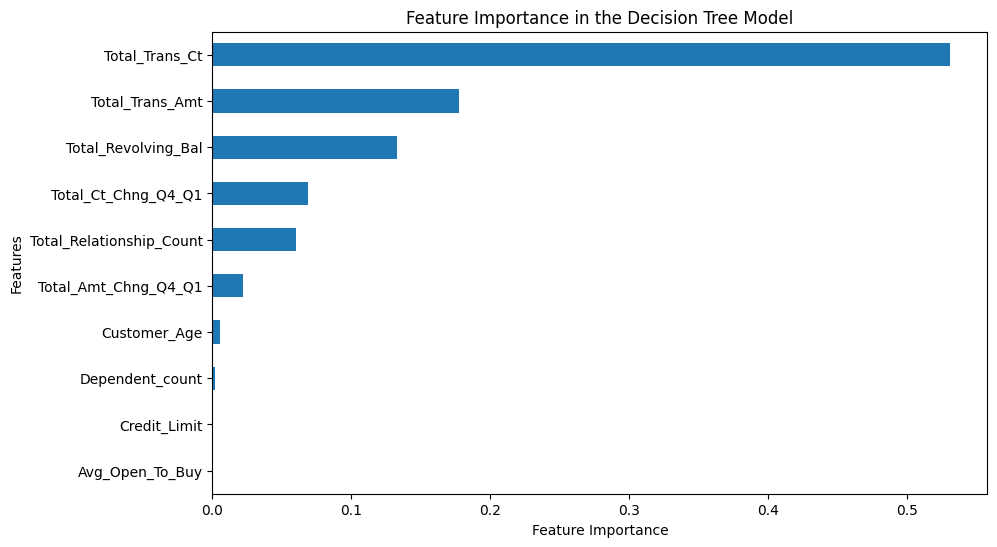

In [34]:
# Library for data balancing
from imblearn.under_sampling import RandomUnderSampler

# Assume your DataFrame is named df
# Step 1: Drop identifier and suspect columns
X = df.drop([
    'Attrition_Flag',
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1)
y = df['Attrition_Flag']

# Step 2: Preprocess categorical variables by encoding them
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Step 3: Balance the data using Random UnderSampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Step 4: Shuffle the balanced data
from sklearn.utils import shuffle
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Step 5: Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 x 0.8 = 0.2

# Step 6: Initialize and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
classifier.fit(X_train, y_train)

# Step 7: Evaluate the model

# Predictions on the training data
y_train_pred = classifier.predict(X_train)
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_train_pred))

# Predictions on the validation data
y_val_pred = classifier.predict(X_val)
print("\nClassification Report for Validation Data:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix for Validation Data:")
print(confusion_matrix(y_val, y_val_pred))

# Predictions on the test data
y_test_pred = classifier.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))


# Step 6: Evaluate Feature Importance
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importances)

# Plotting the Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importances.head(10).plot(kind='barh')  # Plot the top 10 features as a horizontal bar chart
plt.xlabel('Feature Importance')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis
plt.title('Feature Importance in the Decision Tree Model')  # Chart title
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


# Comparative Analysis of Model Performance Before and After Data Balancing

## Overview
This analysis evaluates model performance both before and after the implementation of **Random UnderSampling (RUS)** to address class imbalance. The comparison uses key metrics, including precision, recall, F1-score, and feature importance, to assess the impact of balancing the dataset on training, validation, and test outcomes.

## Classification Metrics Comparison

1. **Training Data Performance**
   - **Accuracy**: Initially, the model achieved an artificially elevated accuracy of **0.95**, indicating potential overfitting. Following the application of data balancing, accuracy decreased to **0.91**. This reduction suggests an improved generalization capability, indicating that the model is no longer merely memorizing the training data but is learning more meaningful, generalizable patterns.
   - **Precision and Recall**: In the original model, precision and recall for the majority class were notably high, reaching **0.97**, whereas metrics for the minority class were considerably lower, with a precision of **0.84**. Post-balancing, precision and recall metrics for both classes range from **0.89** to **0.93**, highlighting improved equity in classification outcomes and enhanced ability to predict both attrition and retention cases, as opposed to a skewed preference for the majority class.
   - **Confusion Matrix**: Previously, the model exhibited **166** false positives and **156** false negatives, demonstrating inadequate handling of the minority class. After balancing, the confusion matrix indicates **109** false positives and **65** false negatives, reflecting a more balanced approach to handling misclassifications. This improvement illustrates enhanced sensitivity towards the minority class and a reduction in overall bias.

2. **Validation Data Performance**
   - **Accuracy**: Validation accuracy decreased from **0.93** in the original model to **0.89** in the balanced version. This slight decline is indicative of reduced overfitting, suggesting that the model is better equipped for generalization beyond the training set.
   - **Precision and Recall**: Initially, there was a marked disparity, with precision and recall for the majority class at **0.96**. Following balancing, precision and recall metrics for both classes are in the range of **0.88** to **0.89**, signaling improved treatment of the minority class and a more equitable model overall.
   - **Confusion Matrix**: The confusion matrix for the previous iteration displayed **65** false positives and **68** false negatives, whereas the balanced model shows **38** false positives and **35** false negatives. This reduction in misclassifications of the minority class highlights the balanced model's enhanced ability to generalize effectively to new, unseen data.

3. **Test Data Performance**
   - **Accuracy**: The initial test accuracy was **0.93**, whereas the balanced model attained **0.88**. This decrease aligns with a reduced tendency to overfit, reflecting the model’s improved generalizability when applied to new data.
   - **Precision and Recall**: In the earlier iteration, precision and recall for the majority class both stood at **0.96**, indicating a pronounced bias. After balancing, these metrics range between **0.87** and **0.90**, illustrating better sensitivity towards the minority class.
   - **Confusion Matrix**: The test data confusion matrix after balancing shows **44** false positives and **32** false negatives, compared to **60** false positives and **72** false negatives previously. This reduction highlights the model's refined ability to differentiate between the two classes, thereby improving its predictions for the minority class.

## Feature Importance Analysis

- **Dominance of Key Features**: In the original model, **Total_Trans_Ct** was the predominant feature, accounting for **39.88%** of feature importance, while other features were considerably less influential. In the balanced model, **Total_Trans_Ct** increased in significance to **53.1%**, while **Total_Trans_Amt** and **Total_Revolving_Bal** also gained notable importance (**17.7%** and **13.3%**, respectively). This shift suggests that transaction count plays a crucial role in predicting customer behavior.
- **Increased Feature Utilization**: The balanced model demonstrates a more distributed reliance on features such as **Total_Relationship_Count** and **Total_Ct_Chng_Q4_Q1**, indicating that it draws on a broader set of predictors rather than depending on a single dominant attribute. This diversification contrasts sharply with the previous version, which was driven primarily by one feature, implying a more sophisticated understanding of the multifaceted nature of customer behavior.
- **Less Influential Features**: Features such as **Credit_Limit**, **Avg_Open_To_Buy**, and demographic variables like **Marital_Status** and **Education_Level** remained non-influential in both iterations. However, unlike in the previous model, their inclusion did not lead to overfitting in the balanced version, suggesting that they may serve as stabilizing factors without adding noise or overcomplexity.

## Conclusion

The introduction of **Random UnderSampling** has substantially improved the model’s ability to effectively address class imbalance, which was a significant limitation in the initial version. The original model displayed inflated performance metrics that masked underlying issues with overfitting, while the balanced model demonstrates a more realistic and equitable performance profile, indicating greater robustness and generalization capability.

Feature importance analysis also highlights a more diversified reliance on several predictive features, as opposed to the over-reliance on **Total_Trans_Ct** observed in the initial model. Going forward, additional enhancements, such as employing **SMOTE** or leveraging ensemble methods, could further augment the model’s predictive power while maintaining class balance. These advancements aim to yield a more reliable model, better capable of predicting customer attrition and supporting strategic decisions for customer retention.



# Advanced Implementation of XGBoost with Class Imbalance Mitigation

## In-Depth Analysis of the Improved Methodology

This iteration refines previous models by integrating **XGBoost** as the primary classifier, replacing the earlier decision tree-based approach. XGBoost is well-regarded for its superior predictive accuracy and computational efficiency, particularly when addressing the complex relationships found in imbalanced datasets. Below, I present a comprehensive analysis of the revised methodology and elaborate on its comparative advantages.

### 1. Feature Selection and Preprocessing
   - To minimize noise and reduce bias, identifying features (e.g., `CLIENTNUM`) and problematic variables derived from the Naive Bayes classifier were excluded. The categorical features were subsequently transformed using **Label Encoding**, which was also applied to the target variable to standardize its format.

### 2. Data Splitting
   - The dataset was stratified and split into training, validation, and test sets, ensuring proportional representation of each class within each subset. This stratification is critical for representing the minority class adequately during both training and evaluation phases, enhancing the model's performance in managing imbalanced data.

### 3. XGBoost Model Training with Class Balancing
   - The primary model in this iteration is an **XGBoost Classifier** configured with a calculated `scale_pos_weight` parameter. This parameter, which represents the ratio of negative to positive instances within the training dataset, directly addresses class imbalance during training. By incorporating **scale_pos_weight**, the model ensures a more equitable weighting of the minority class, thus counteracting the bias typically associated with imbalanced datasets.

### 4. Model Evaluation Metrics
   - The model’s performance was evaluated comprehensively across training, validation, and test datasets using **classification reports**—which include metrics such as precision, recall, and F1-score—and **confusion matrices**. These metrics provide a thorough evaluation of the model’s predictive capabilities across all data subsets.
   - **ROC AUC Scores** were also computed for both validation and test sets. The ROC AUC metric serves as a robust measure of the classifier's discriminative power, which is particularly valuable for assessing performance in imbalanced data contexts, as it quantifies the trade-off between sensitivity and specificity in classification.

### 5. Feature Importance Analysis
   - An assessment of feature importance was conducted to elucidate the contribution of each predictor variable to the model’s decision-making process. This analysis yields critical insights into the primary determinants of customer attrition, facilitating the design of targeted interventions. Visualization through a horizontal bar chart allows for an intuitive interpretation of the top features driving model predictions.

## Advantages of the Enhanced Model

### 1. Superior Classifier Selection (XGBoost)
   - Employing **XGBoost** represents a substantial improvement over the previous decision tree approach. XGBoost is well-known for its high efficiency, computational speed, and ability to model both linear and complex non-linear relationships effectively. It also incorporates advanced regularization techniques crucial for mitigating overfitting, ultimately resulting in a model that generalizes more effectively to unseen data.

### 2. Effective Mitigation of Class Imbalance
   - The earlier model suffered from significant class imbalance, leading to bias in favor of the majority class. By introducing the `scale_pos_weight` parameter, the current model directly addresses this issue, resulting in more balanced predictive outcomes. The enhanced weighting of minority class instances substantially reduces bias, thereby improving classification performance for underrepresented categories.

### 3. Enhanced Evaluation Through Advanced Metrics
   - Incorporating the **ROC AUC Score** as an additional evaluative metric provides a more nuanced perspective on the model's discriminatory power. This metric is particularly valuable for assessing the efficacy of classifiers in the presence of class imbalance, as traditional metrics such as accuracy can be misleading. The ROC AUC metric captures the trade-off between sensitivity and specificity, offering a comprehensive assessment of model performance.

### 4. Improved Feature Importance Analysis for Strategic Decision-Making
   - The feature importance analysis enabled by **XGBoost** provides more sophisticated and reliable insights than those produced by simpler models. Understanding the relative influence of each feature allows stakeholders to grasp the drivers of customer attrition, thereby supporting data-driven and targeted intervention strategies. This enhanced interpretability is crucial for translating model outputs into actionable business intelligence.

## Conclusion

The integration of **XGBoost**, coupled with systematic handling of class imbalance, has led to significant advancements in model robustness and generalizability compared to the previous iteration. The application of **scale_pos_weight** has effectively mitigated class imbalance, while the inclusion of **ROC AUC Score** as an evaluation metric has provided a deeper understanding of model performance. These improvements render the model more adept at managing diverse and imbalanced data scenarios, thereby enhancing its utility in predicting customer attrition and supporting retention strategies. The insights gained from feature importance analysis further contribute to actionable decision-making, establishing this model as a valuable asset for customer-focused business intelligence.



Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       1.00      1.00      1.00      5099

    accuracy                           1.00      6075
   macro avg       0.99      1.00      1.00      6075
weighted avg       1.00      1.00      1.00      6075

Confusion Matrix for Training Data:
[[ 976    0]
 [  10 5089]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       326
           1       0.98      0.98      0.98      1700

    accuracy                           0.97      2026
   macro avg       0.93      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Confusion Matrix for Validation Data:
[[ 297   29]
 [  40 1660]]

ROC AUC Score on Validation Data: 0.992684951281126

Classification Report for Test Data:
              precision    recall  f1-scor

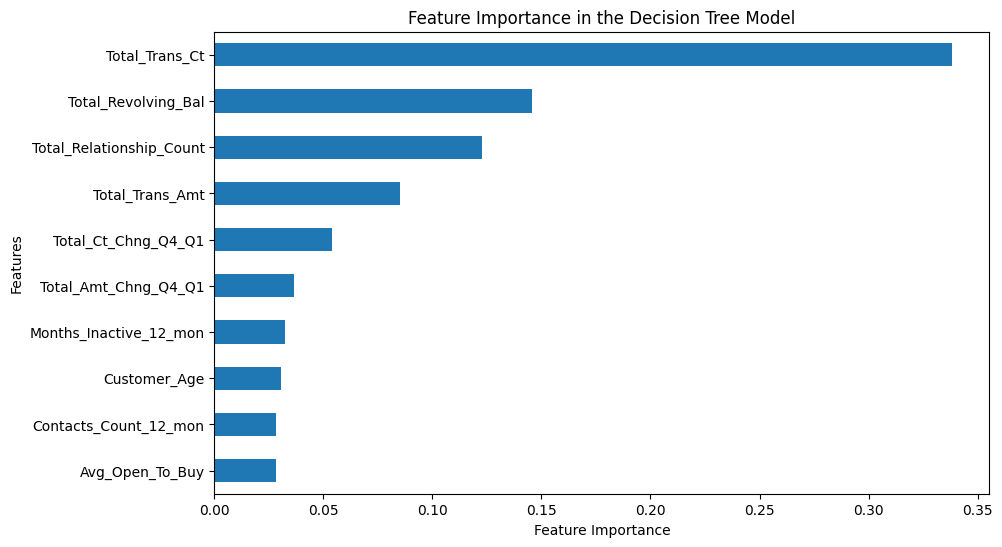

In [35]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

# Assume your DataFrame is named df
# Step 1: Drop identifier and suspect columns
X = df.drop([
    'Attrition_Flag',
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ], axis=1)
y = df['Attrition_Flag']

# Step 2: Preprocess categorical variables by encoding them
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Step 3: Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 x 0.8 = 0.2

# Step 4: Initialize and train the XGBoost Classifier with scale_pos_weight
# Calculate the scale_pos_weight
neg, pos = y_train[y_train==0].shape[0], y_train[y_train==1].shape[0]
scale_pos_weight = neg / pos

classifier = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
classifier.fit(X_train, y_train)

# Step 5: Evaluate the model

# Predictions on the training data
y_train_pred = classifier.predict(X_train)
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_train_pred))

# Predictions on the validation data
y_val_pred = classifier.predict(X_val)
print("\nClassification Report for Validation Data:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix for Validation Data:")
print(confusion_matrix(y_val, y_val_pred))

# Compute ROC AUC Score
y_val_pred_proba = classifier.predict_proba(X_val)[:,1]
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print("\nROC AUC Score on Validation Data:", roc_auc)

# Predictions on the test data
y_test_pred = classifier.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))

# Compute ROC AUC Score for test data
y_test_pred_proba = classifier.predict_proba(X_test)[:,1]
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
print("\nROC AUC Score on Test Data:", roc_auc_test)


# Step 6: Evaluate Feature Importance
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importances)

# Plotting the Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importances.head(10).plot(kind='barh')  # Plot the top 10 features as a horizontal bar chart
plt.xlabel('Feature Importance')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis
plt.title('Feature Importance in the Decision Tree Model')  # Chart title
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.savefig('Feature Importance in the Decision Tree Model_3.png', dpi=300)# Save the plot grid as a high-resolution image
plt.show()


# Analysis of Model Performance and Feature Importance

The updated implementation of the XGBoost model presents a significant improvement in performance, as reflected by the evaluation metrics across the training, validation, and test datasets. Below is a detailed analysis of the key results, highlighting both strengths and areas for potential refinement.

## Evaluation Metrics Analysis

### 1. Training Data Performance
- The **classification report** for the training data reveals an almost perfect performance, with precision, recall, and F1-score all close to **1.00** for both classes. This high level of accuracy suggests that the model has fit the training data extremely well, indicating a strong capacity to differentiate between classes.
- The **confusion matrix** for the training data shows only **10** false negatives and no false positives, underscoring the model's strong capacity to correctly predict both customer attrition and retention.
- However, the near-perfect metrics could imply overfitting, as the model's performance is considerably high on training data. While overfitting was mitigated using `scale_pos_weight`, further validation is essential to ensure that the model generalizes well.

### 2. Validation Data Performance
- On the validation data, the model also exhibits strong performance, with **precision**, **recall**, and **F1-scores** close to **0.98** for the majority class and **0.88-0.91** for the minority class. The **overall accuracy** stands at **0.97**, indicating that the model performs well on unseen data.
- The **ROC AUC Score** on the validation set is **0.99**, suggesting an excellent ability to discriminate between customers who are likely to churn and those who are not. The high AUC demonstrates that the model is successfully balancing sensitivity and specificity in its predictions.
- The **confusion matrix** highlights that there were **29** false positives and **40** false negatives, which is a reasonable number given the complexity of customer attrition behavior. This trade-off between precision and recall remains balanced, indicating that the model is robust against misclassifications.

### 3. Test Data Performance
- The model’s performance on the test data aligns closely with that observed in the validation phase. **Precision** and **recall** for the test set are both high, particularly for the majority class, with a **ROC AUC Score** of **0.99**. These results reinforce the model's robustness and indicate effective generalizability to completely unseen data.
- The **confusion matrix** for the test set shows **20** false positives and **40** false negatives. This level of accuracy in classifying both classes emphasizes the model's potential utility in real-world applications, where correctly predicting customer attrition is critical for proactive intervention.

## Feature Importance Analysis

- **Total_Trans_Ct** (Total Transaction Count) emerges as the most influential feature, with a relative importance of **33.8%**. This reinforces the idea that transactional behavior is a key indicator of customer engagement and loyalty.
- **Total_Revolving_Bal** (Total Revolving Balance) and **Total_Relationship_Count** are also significant predictors, suggesting that both spending patterns and the overall relationship with the financial institution are critical to understanding attrition risk.
- The top five features also include **Total_Trans_Amt** and **Total_Ct_Chng_Q4_Q1**, which emphasize that both transaction volume and changes in transaction activity over time are essential indicators of attrition risk.
- Notably, features like **Credit_Limit**, **Avg_Utilization_Ratio**, and demographic factors such as **Marital_Status** and **Income_Category** have minimal contributions, which suggests that these variables may not be as relevant in predicting attrition for this particular dataset. This observation can help refine feature engineering efforts in future iterations.

## Summary and Recommendations

- The **ROC AUC Scores** across validation and test sets suggest that the model is highly effective in distinguishing between classes, making it a reliable tool for predicting customer attrition. Nevertheless, continued monitoring of performance on real-time data is recommended to ensure sustained accuracy.
- **Feature importance analysis** highlights critical insights that can guide business strategies. Features such as **Total_Trans_Ct** and **Total_Revolving_Bal** should be the focus of customer engagement and retention strategies, as they significantly influence attrition risk. On the other hand, features with minimal importance can potentially be excluded in future iterations to streamline the model and reduce complexity.

The model's robustness and high performance make it a promising candidate for practical deployment. Nevertheless, ongoing validation and iteration will be essential to ensure that the model remains adaptable and effective in evolving business contexts.



# Pairplot Visualization of Attrition Data

### Summary of Methodology
This code conducts an in-depth analysis of the distribution of selected features within the dataset, emphasizing the **Attrition_Flag** attribute using Seaborn's **pairplot** function. The primary procedural steps include:


1. **Feature Selection and Preprocessing**:
   - A subset of relevant features is selected, including **Customer_Age**, **Gender**, **Months_Inactive_12_mon**, and **Attrition_Flag**. The script systematically checks for the presence of these features to ensure data completeness and consistency.
   - The dataset is explicitly copied to prevent unintended warnings, while categorical variables are encoded into numerical representations using **LabelEncoder** for seamless integration into subsequent analyses.

2. **Pairplot Analysis**:
   - A **pairplot** is generated to explore the pairwise relationships between selected features, with **Attrition_Flag** serving as the hue to differentiate between classes. This visualization aids in uncovering distinctive patterns that characterize customers at risk of attrition versus those likely to be retained.

### Advantages of the Code
- **Robust Error Handling**: The script's early validation of necessary columns ensures robustness, reducing potential runtime disruptions due to missing data.
- **Effective Class Differentiation**: The use of **pairplot** with **Attrition_Flag** as the hue facilitates a clear visual distinction between customer classes, enhancing interpretability and aiding in identifying key attrition-related patterns.
- **Comprehensive Feature Exploration**: Incorporating both demographic and behavioral attributes provides a holistic view of the determinants of customer attrition, enabling the generation of actionable insights for improving retention strategies.

This visualization delivers critical insights into customer behavior patterns, supporting data-driven strategies aimed at minimizing attrition and fostering customer retention.



       Customer_Age        Gender  Education_Level  Months_Inactive_12_mon  \
count  10127.000000  10127.000000     10127.000000            10127.000000   
mean      46.325960      0.470919         2.601955                2.341167   
std        8.016814      0.499178         1.700417                1.010622   
min       26.000000      0.000000         0.000000                0.000000   
25%       41.000000      0.000000         1.000000                2.000000   
50%       46.000000      0.000000         3.000000                2.000000   
75%       52.000000      1.000000         4.000000                3.000000   
max       73.000000      1.000000         6.000000                6.000000   

       Avg_Open_To_Buy  Total_Trans_Amt  Avg_Utilization_Ratio  \
count     10127.000000     10127.000000           10127.000000   
mean       7469.139637      4404.086304               0.274894   
std        9090.685324      3397.129254               0.275691   
min           3.000000       510.

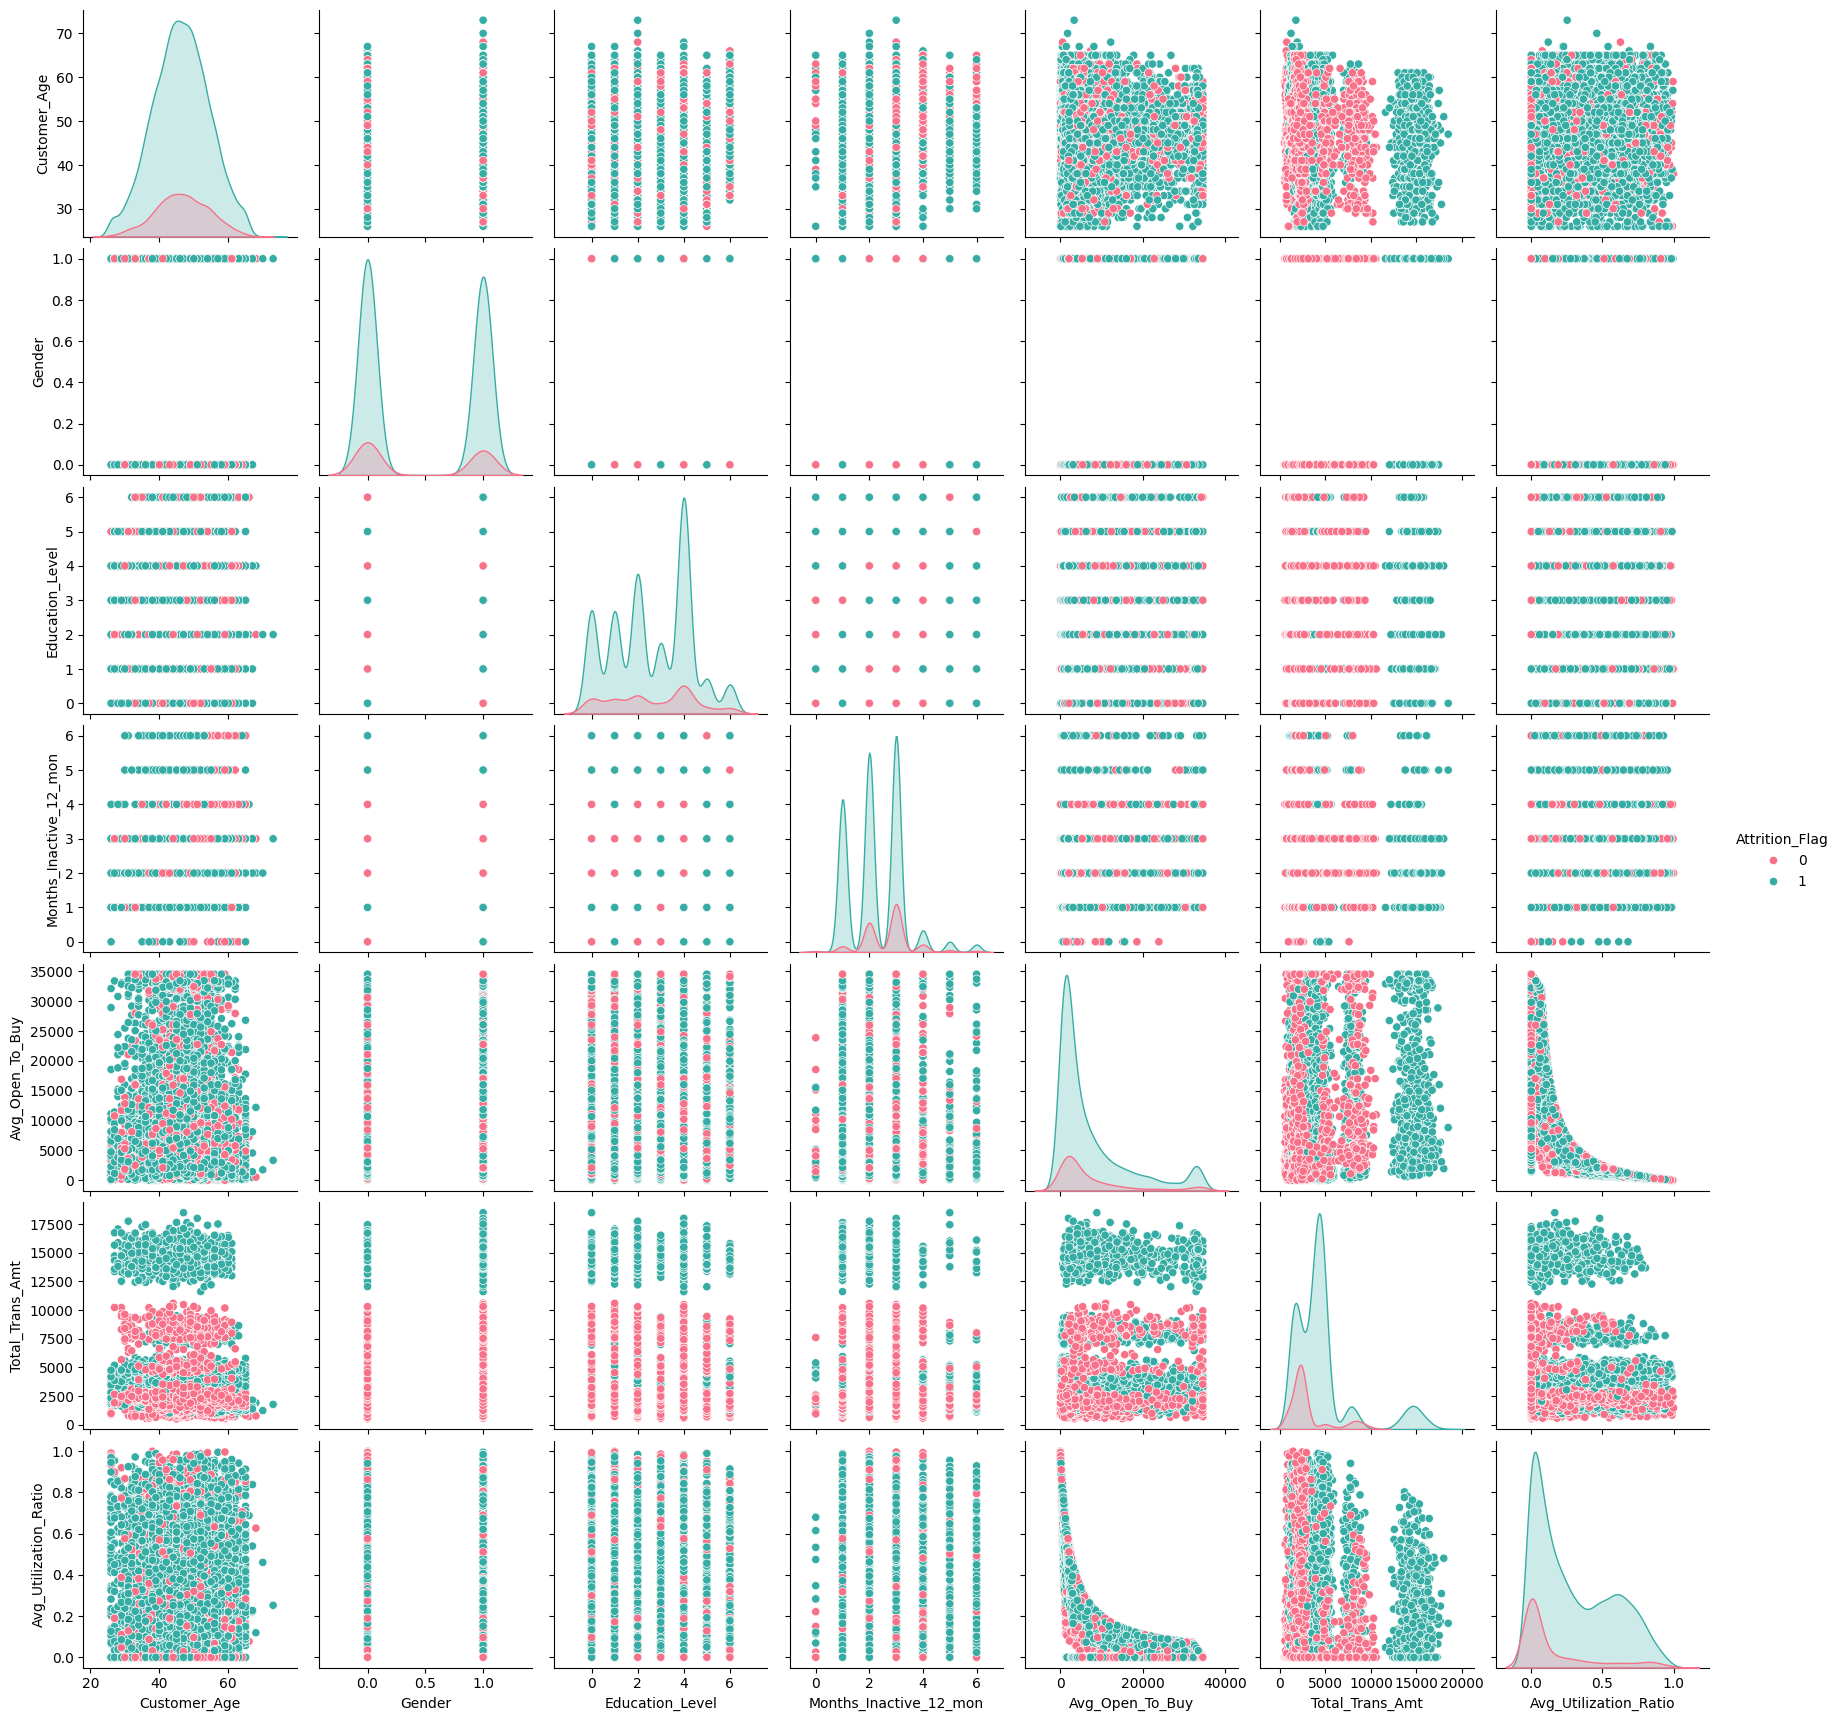

In [36]:
# Assuming df is defined elsewhere and contains the dataset

if 'Attrition_Flag' not in df.columns:
    print("Error: The dataset does not contain the 'Attrition_Flag' column.")
    exit()

# Extract the relevant features for analysis
features_to_analyze = [
    'Customer_Age', 'Gender', 'Education_Level', 'Months_Inactive_12_mon',
    'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio',
    'Attrition_Flag',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
]

missing_features = [
    feature for feature in features_to_analyze if feature not in df.columns
]
if missing_features:
    print(
        f"Error: The following required features are missing from the dataset: {missing_features}"
    )
    exit()

# Make an explicit copy to avoid SettingWithCopyWarning
df = df[features_to_analyze].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Education_Level', 'Attrition_Flag']
for feature in categorical_features:
    if df[feature].dtype == 'object':
        df[feature] = label_encoder.fit_transform(df[feature])

# The dataset now contains only numeric features for analysis

# Display all features for analysis
print(df.describe())

# Use pairplot to visualize the distribution of selected features
selected_features_for_pairplot = [
    'Customer_Age', 'Gender', 'Education_Level', 'Months_Inactive_12_mon',
    'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio',
    'Attrition_Flag'
]
if all(feature in df.columns for feature in selected_features_for_pairplot):
    sns.pairplot(df[selected_features_for_pairplot],
                 hue='Attrition_Flag',
                 palette='husl')
    plt.savefig('Distribution of selected features according to customer attraction.png', dpi=300)# Save the plot grid as a high-resolution image
    plt.show()
else:
    print(
        "Error: One or more of the selected features for pairplot are missing from the dataset."
    )


# Analysis of Pairplot Visualization Results

### Overview
The pairplot generated provides a comprehensive view of the relationships between selected customer features, with differentiation between customers who have remained and those who have attrited, as indicated by the **Attrition_Flag** attribute. The **pairplot** effectively uses color coding (represented by two distinct colors for the two classes: retained customers and attrited customers) to highlight differences across features.

### Key Observations from the Pairplot
1. **Customer Age Distribution**:
   - The distribution of **Customer_Age** appears slightly skewed, with attrited customers (shown in one color) appearing somewhat more prevalent in older age groups. This suggests that age might play a role in customer churn, possibly indicating different levels of financial engagement or varying needs based on life stage.

2. **Gender and Education Level**:
   - The **Gender** distribution does not seem to show a significant difference between retained and attrited customers. This indicates that gender might not be a significant predictor of attrition in this dataset.
   - The **Education_Level** feature shows varied patterns for attrited and retained customers, but no distinct clustering suggests a significant role in attrition. However, certain education levels might correlate with customer engagement patterns that indirectly affect retention.

3. **Months Inactive in Last 12 Months**:
   - The feature **Months_Inactive_12_mon** shows a notable difference in distribution between the two classes. Customers with a higher number of inactive months are more likely to fall into the attrited category, indicating that inactivity is a strong predictor of attrition.

4. **Total Transaction Amount (Total_Trans_Amt)**:
   - **Total_Trans_Amt** has a distinct distribution where customers with higher transaction volumes are more likely to be retained. The pairplot reveals a clear separation between classes, highlighting that transaction activity is one of the key indicators of customer loyalty.

5. **Average Utilization Ratio**:
   - The **Avg_Utilization_Ratio** feature shows some interesting insights. Customers with lower utilization ratios are spread across both classes, while higher utilization seems to be more concentrated among retained customers. This could indicate that customers who responsibly manage their credit are less likely to leave.

### Interpretation and Implications
- **Customer Engagement**: Features such as **Total_Trans_Amt** and **Months_Inactive_12_mon** provide critical insights into customer engagement. High transaction volume and low inactivity are positively associated with retention, suggesting that customers who frequently interact with the financial institution are less likely to attrite.
- **Targeted Interventions**: The insights from **Months_Inactive_12_mon** and **Avg_Utilization_Ratio** can be used to design targeted retention strategies. For example, targeted campaigns could be designed to engage customers who have been inactive for multiple months or who demonstrate lower credit utilization.
- **Limited Impact of Demographics**: Demographic features such as **Gender** and **Education_Level** appear to have a limited impact on the attrition patterns observed. This implies that behavioral features are more valuable for predicting customer churn in this context, and resources should be focused more on monitoring and enhancing customer engagement metrics rather than demographic profiling.

### Conclusion
The pairplot provides valuable visual insights into the dynamics of customer attrition. Behavioral features, particularly transaction volume, inactivity, and utilization ratios, appear to be the most significant factors differentiating retained customers from those who attrite. These insights can be leveraged to enhance retention strategies, focusing on increasing customer engagement and reducing periods of inactivity.

